<a href="https://colab.research.google.com/github/SojoodAbuAlrub/Project-2-/blob/main/Modified_Copy_of_Sales_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A modified copy of Project 1, part 6

1.   List item
2.   List item



## Loading Data

In [78]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [19]:
path = "/content/drive/MyDrive/AXSOSACADEMY (1)/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df=pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Cleaning Data


In [20]:
# Checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
# Checking Duplicates
df.duplicated().sum()

0

In [22]:
# Checking Null Values
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Those missing value will be imputed lately after splitting

In [23]:
# addressing the unique data

cat_cols = df.select_dtypes("object").columns

for col in cat_cols:
    print(df[col].value_counts() )
    print ("\n")

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: cou

In [24]:
# Dropping Outlet_Identifier column
df.drop(columns="Outlet_Identifier",inplace=True)

In [25]:
# Replacing inconsistent categories in Item_Fat_Content for encoding later
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':"Low Fat",'reg':'Regular' , "low fat": "Low Fat"})
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


## Redefining X and y

In [59]:
# Make x and y variables
y = df['Item_Outlet_Sales']
X = df.drop(columns=['Item_Outlet_Sales'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,NCG06,16.350,Low Fat,0.029565,Household,256.4646,2009,Medium,Tier 3,Supermarket Type2
7510,FDV57,15.250,Regular,0.000000,Snack Foods,179.7660,2009,Medium,Tier 3,Supermarket Type2
5828,FDM27,12.350,Regular,0.158716,Meat,157.2946,1999,Medium,Tier 1,Supermarket Type1
5327,FDG24,7.975,Low Fat,0.014628,Baking Goods,82.3250,2004,Small,Tier 2,Supermarket Type1
4810,FDD05,19.350,Low Fat,0.016645,Frozen Foods,120.9098,2002,NaN,Tier 2,Supermarket Type1


## Preprocessing

In [97]:
# Categorical Pipeline
ohe_cols = X_train.select_dtypes('object').columns
impute_constant = SimpleImputer(strategy= 'most_frequent')
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_pipe = make_pipeline(impute_constant, ohe_encoder)
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

In [61]:
# Numeric Pipeline
num_cols = X_train.select_dtypes('number').columns
impute_mean =(SimpleImputer(strategy='mean'))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
num_tuple = ('numeric', num_pipe, num_cols)

In [69]:
# Ordinal Pipeline
ord_col=['Outlet_Location_Type','Outlet_Size','Item_Fat_Content']
odr_impute = SimpleImputer(strategy='most_frequent')
qual_ordinal_location=('Tier 1','Tier 2','Tier 3')
qual_ordinal_size=('Small','Medium','High')
qual_ordinal_fat=('Low Fat','Regular')
ordinal_category_orders=[qual_ordinal_location , qual_ordinal_size , qual_ordinal_fat]
ord_scaler=StandardScaler()
ord_encoder=OrdinalEncoder(categories=ordinal_category_orders)
ord_pipi=make_pipeline(odr_impute,ord_encoder,ord_scaler)
ord_tuple=('ord',ord_pipi,ord_col)

In [98]:
# Create the Column Transformer
preprocessor = ColumnTransformer([num_tuple, ohe_tuple, ord_tuple ], verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=F...
      dtype='object')),
                                ('ord',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[('Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3'),
                                                                             ('Small',
                                                                              'Medium',
                                                                              'High'),
                                                                             ('Low '
                                                                              'Fat',
                                                                              'Regular')])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Location_Type', 'Outlet_Size',
                                  'Item_Fat_Content'])],
                  verbose_feature_names_out=False)

In [99]:
# Fitting column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP', ...,
       'Outlet_Location_Type', 'Outlet_Size', 'Item_Fat_Content'],
      dtype=object)

In [100]:
# Creating a preprocessed DataFrame of training and test  sets
X_train_tf = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_test_tf = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)

## Linear Regression


In [101]:
lr = LinearRegression()
lr_pipe = make_pipeline(preprocessor, LinearRegression())
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(ha...
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[('Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'),
                                                                                              ('Small',
                                                                                               'Medium',
                                                                                               'High'),
                                                                                              ('Low '
                                                                                               'Fat',
                                                                                               'Regular')])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Location_Type',
                                                   'Outlet_Size',
                                                   'Item_Fat_Content'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [102]:
# Extract and visualize the coefficients determined by linear regression model
coeffs = pd.Series(lr_pipe[-1].coef_, index=feature_names)
coeffs

,0
Item_Weight,2.618645e+00
Item_Visibility,-5.471527e+02
Item_MRP,-1.110398e+01
Outlet_Establishment_Year,3.813966e+01
Item_Identifier_DRA12,2.589890e+13
...,...
Outlet_Type_Supermarket Type2,1.368106e+13
Outlet_Type_Supermarket Type3,1.368106e+13
Outlet_Location_Type,3.493391e+13
Outlet_Size,1.192596e+13


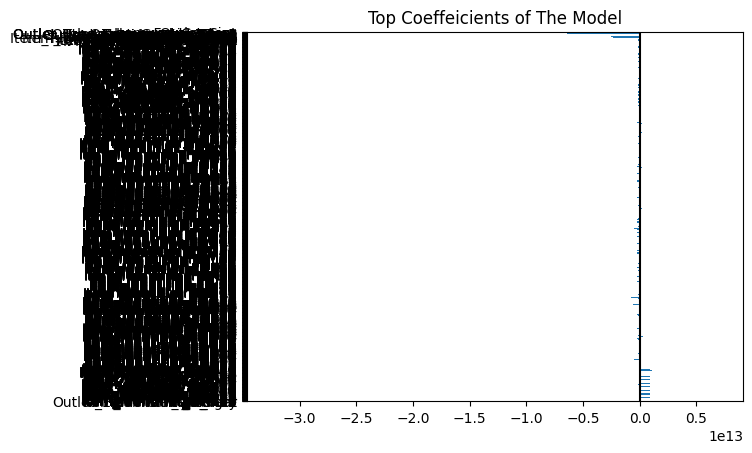

In [91]:
# Plotting these Coeff
ax = coeffs.plot(kind='barh')
ax.axvline(0,color='k')
ax.set_title('Top Coeffeicients of The Model');


In [104]:
# Defining top 3 features
top_3_features = coeffs.abs().sort_values(ascending=False).head(3)
top_3_features


,0
Outlet_Location_Type_Tier 3,7.491175e+13
Item_Fat_Content_Regular,5.048000e+13
Item_Type_Soft Drinks,3.652254e+13


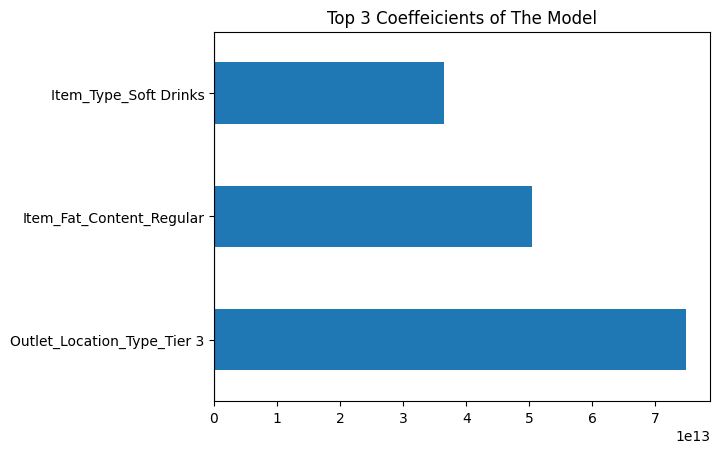

In [105]:
# Plotting top 3 coeff
ax = top_3_features.plot(kind='barh')
ax.axvline(0,color='k')
ax.set_title('Top 3 Coeffeicients of The Model');

## Random Forest

In [81]:
# Pipeline and fitting the random forest
rf_tree_pipe = make_pipeline(preprocessor,RandomForestRegressor(random_state = 42))
rf_tree_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[('Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'),
                                                                                              ('Small',
                                                                                               'Medium',
                                                                                               'High'),
                                                                                              ('Low '
                                                                                               'Fat',
                                                                                               'Regular')])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Location_Type',
                                                   'Outlet_Size',
                                                   'Item_Fat_Content'])],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [94]:
# Extract and visualize the feature importances that your best model determined.
importances = pd.Series(rf_tree_pipe[-1].feature_importances_, index=feature_names)

importances

,0
Item_Weight,0.029222
Item_Visibility,0.058667
Item_MRP,0.404108
Outlet_Establishment_Year,0.031489
Item_Identifier_DRA12,0.000018
...,...
Outlet_Type_Supermarket Type2,0.001404
Outlet_Type_Supermarket Type3,0.061649
Outlet_Location_Type,0.003789
Outlet_Size,0.004610


In [95]:
# Identify the top 5 most important features.
top_5_features = importances.abs().sort_values(ascending=False).head(5)
top_5_features

,0
Item_MRP,0.404108
Outlet_Type_Grocery Store,0.191730
Outlet_Type_Supermarket Type3,0.061649
Item_Visibility,0.058667
Outlet_Establishment_Year,0.031489


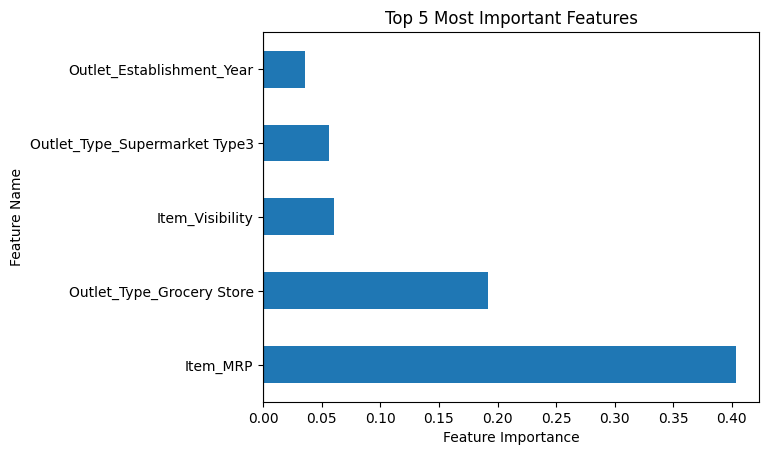

In [84]:
# Plotting Top 5 Importance Fetures
ax = top_5_features.plot(kind='barh')
ax.axvline(0,color='k')
ax.set(ylabel='Feature Name',xlabel='Feature Importance',
       title='Top 5 Most Important Features');

Top 5 Most Important Features are:
- Item_MRP
- Outlet_Type_Grocery Store
- Item_Visibility
- Outlet_Type_Supermarket Type3
- Outlet_Establishment_Year